### Problem statement
The data scientist at Big mart have collected sales data for one thousand five hundred and fifty-nine products across ten 
stores in different cities. Furthermore, certain attributes of each product and store have been defined.The aim is to build 
a predictive model and find the sales figures of each product at a particular store.

usin this model, Big Mart will try to understand and properties of products and stores, which play a key role in increasing
sales
lets now try and uderstand what could affect the target variable ''sales''.
1. Time of the week
2. Time of the day
3. Time of the year
4. Store size and location
5. The item in question

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the train and test dataset in pandas Dataframe
train=pd.read_csv('Train_big.csv')
test=pd.read_csv('Test_big.csv')

In [3]:
# check number of rows and columns in train dataset
train.shape

(8523, 12)

In [4]:
# print the name of the column  in train dataset
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
# Check the number of rows and columns in test dataset
test.shape

(5681, 11)

In [6]:
# print the name of the column in test dataset
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
# Combine test and train into one file to perform EDA
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True)
print(data.shape)

(14204, 13)


In [8]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [9]:
# checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [10]:
# The column Item_Weight has two thousand four hundred thirty nine (2439) missing values and Outlet_Size_ has around four thousand and sixteen (4016).
# Item_outlet_Sales has five thousand six hundred eighty one (5681) missing values, which we will predict using the model.

# Print the unique values in the Item_Fat_Content column, where there are only two unique types of fat content in times: low fat and regular
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
# print the unique values in the Outlet_Establishment_Year column, where the data ranges from 1985 to 2009
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [12]:
# calculate the Outlet_Age
data["Outlet_Age"]=2018-data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [13]:
# Unique values in Outlet_Size
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

### Note:- There are also missing values in this column

In [14]:
# Printing the count value of Item_fat_Content column
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

#### We can see that the majpority of outlets are medium and small-scale outlets.

In [15]:
# Use the mode function to find out the most common value in Outlet_Size
data['Outlet_Size'].mode()[0]

'Medium'

### The output shows that 'medium' is the most commonly occuring value.

In [16]:
# Two variable with missing values- Item Weight and Outlet_Size
# Replacing missing values in Outlet_Size with the value "Medium"
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [17]:
# Replacing missing values in Item_Weight with the mean weight
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())

<AxesSubplot:>

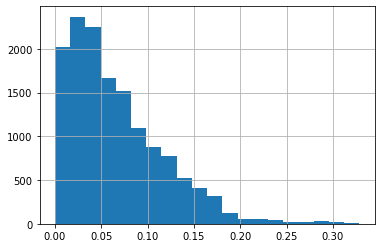

In [18]:
# Plot a histogram to reveal the distribution of Item_Visibility column
data["Item_Visibility"].hist(bins=20)

In [19]:
# Detecting outliers:
# An outlier is the data point that lies outside the overall pattern in a distribution.
# A commonly used rule states that a data point is an outlier if it is more than 1.5*IQR above the third quartile or below the first quartile.
# Using this, one can remove the outlier and output the resulting data in fill_data variable.
# calculate the first and second quartile for Item_Visibility
Q1= data['Item_Visibility'].quantile(0.25)
Q3= data['Item_Visibility'].quantile(0.75)

In [20]:
# calculate the inter quartile range(IQR)
IQR= Q3-Q1

In [21]:
# Now that the IQR range is known, remove the outlier from the data
# The resulting data is stored in fill_data variable
fill_data=data.query('(@Q1 - 1.5*@IQR)<=Item_Visibility<= (@Q3 + 1.5*@IQR)')

In [22]:
fill_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,31


In [23]:
#  Check the shape of the resulting dataset without the outliers
fill_data.shape

(13943, 14)

In [24]:
# shape of the original dataset is fourteen thousand two hundred and four (14204) rows and fourteen columns with outliers
data.shape

(14204, 14)

In [25]:
# Assign fill_data dataset to data Dataframe
data=fill_data

In [26]:
data.shape

(13943, 14)

In [76]:
# Modify Item_Visibility  by converting the numerical values into the categories Low Visibility,Visibility and High Visibility.
data['Item_Visibility_bins']=pd.cut(data['Item_Visibility'],[0.00,0.065,0.13,0.2],labels=['Low Viz','Viz','High Viz'])

In [77]:
# Print the count of Item_Visibility_bins
data['Item_Visibility_bins'].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [79]:
# Replace null valuse with Low Visibility
data['Item_Visibility_bins']=data['Item_Visibility_bins'].replace(np.nan,'Low Viz',regex=True)

In [30]:
# We found types and difference in representation in categories of Item_Fat_Content variable.
# This can be corrected using the code on screen.

# Replace all other representation of Low fat with Low Fat
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

In [31]:
# Replace all representation of reg with Regular
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('reg','Regular')

In [32]:
# Print unique fat count-values
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [33]:
# Code all categorical variable as numeric using "LabelEncoder" from sklearn's preprocessing module
# Initialize the Label Encoder
le = LabelEncoder()

In [34]:
# Transform Item_Fat_Content
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])

In [35]:
# Transform Item_Visibility_bins
data['Item_Visibility_bins']=le.fit_transform(data['Item_Visibility_bins'])

In [36]:
# Transform Outlet_size
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])

In [37]:
# Transform Outlet_Location_Type
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])

In [38]:
# Print the unique values of Outlet_Type
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [39]:
# Create dummies for Outlet_Type
dummy = pd.get_dummies(data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [40]:
# Explore the column Item_Identifier
data['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [41]:
# As there are multiple values of Food, nonconsumble items, and drinks with different numbers, combine the item type
data['Item_Identifier'].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [42]:
# As multiple categories are present in Item_Identifier, reduce this by mapping
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food',
                                                        'NC': 'Non-consumable',
                                                        'DR': 'Drinks'})                                                 

In [43]:
# Only three categories are present in an Item_Type_Combined column.
data['Item_Type_Combined'].value_counts()

Food              9991
Non-consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [44]:
data.shape

(13943, 16)

In [45]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Visibility_bins,Item_Type_Combined
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,train,19,1,Food
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,train,9,1,Drinks


In [46]:
# Perform one-hot encoding for all columns as the model works on numerical values and not an categorical values
data=pd.get_dummies(data,columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])

In [47]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [48]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Age,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,19,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,9,...,0,1,0,0,0,1,0,1,0,0


In [49]:
import warnings
warnings.filterwarnings('ignore')

# Drop the columns which have been converted to different types
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

# Divide the dataset created earlier into train and test datasets
train=data.loc[data['source']=='train']
test= data.loc[data['source']== 'test']

# Drop unncessary columns
test.drop(['Item_Outlet_Sales','source'],axis=1, inplace= True)
train.drop(['source'],axis=1,inplace=True)

#Export modified versions of the files
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

In [50]:
# Read the train_modified.csv and test_modified.csv dataset
train2=pd.read_csv('train_modified.csv')
test2=pd.read_csv('test_modified.csv')

In [51]:
# print the data types of train2 column
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_

In [52]:
# Drop the irrelevant variables from train2 dataset
# create the independent variable X_train and dependent variable Y_train
X_train = train2.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'],axis=1)
y_train = train2.Item_Outlet_Sales

In [53]:
# Drop those irrelevent variable from test2 dataset
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'],axis=1)

In [54]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-consumable
0,20.750000,0.007565,107.8622,19,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,11,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,20,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,11,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,33,2,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,21,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5564,7.600000,0.142991,169.1448,9,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5565,10.000000,0.073529,118.7440,16,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5566,15.300000,0.000000,214.6218,11,3,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [55]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-consumable
0,9.30,0.016047,249.8092,19,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,9,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0


In [56]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [57]:
# Import sklearn libraries for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [58]:
# Create a train and test split
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [59]:
# Fit linear regression to the training dataset
lin = LinearRegression()

In [60]:
lin.fit(xtrain,ytrain)

LinearRegression()

In [61]:
# Find the coefficient and intercept of the line
# Use xtrain and ytrain for linear regression
print(lin.coef_)
lin.intercept_

[-1.93054423e+00 -3.47449893e+02  1.58788136e+01 -3.19310190e+01
 -4.64698319e+00 -1.55426303e+00  1.55426303e+00  1.88969149e+02
  4.83874237e+01 -2.37356573e+02  5.39972452e+02 -3.11545503e+02
 -2.28426949e+02 -1.63452944e+03 -1.26820412e+02 -3.48655405e+02
  2.11000526e+03  9.06454503e+00  3.46403369e+01 -4.37048820e+01]


946.4212171360759

In [62]:
# Predict the test set results of training data
predictions = lin.predict(xtest)
predictions

array([2077.92386202, 3704.93216108, 2961.28180591, ..., 3541.28725867,
       3464.78656382, 1249.59368407])

In [63]:
import math

In [64]:
# Find the RMSE for model
print(math.sqrt(mean_squared_error(ytest,predictions)))

1126.2352692434754


In [65]:
# A good RMSE for this problem is 1130. Here, we can imporve the RMSE by using algorithms like decision tree, random forest, and XGboost.
# Next, we will predict the sales of each product at a particular store in test data.

In [66]:
# Predict the column Item_Outlet_sales of test dataset
y_sales_pred=lin.predict(X_test)
y_sales_pred

array([1788.81075495, 1593.90875193, 1845.79649796, ..., 1831.65421972,
       3605.8573969 , 1284.78769015])

In [67]:
test_predictions=pd.DataFrame({'Item_Identifier':test2['Item_Identifier'],
                               'Outlet_Identifier':test2['Outlet_Identifier'],
                               'Item_Outlet_Sales':y_sales_pred},
                              columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [68]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1788.810755
1,FDW14,OUT017,1593.908752
2,NCN55,OUT010,1845.796498
3,FDQ58,OUT017,2675.927968
4,FDY38,OUT027,5134.091429
...,...,...,...
5563,FDB58,OUT046,2360.100059
5564,FDD47,OUT018,2419.143609
5565,NCO17,OUT045,1831.654220
5566,FDJ26,OUT017,3605.857397
